In [144]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
#import plotly.express as px
from datetime import datetime

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.mixture import GaussianMixture
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [145]:
data = pd.read_csv('data/cluster_by_player.csv')
data = data.drop(["Unnamed: 0", "game_id", 'home_team_id', 'visitor_team_id', 'season', 'team_id'], axis=1)
data.columns

Index(['player_id', 'player_name', 'played', 'mpg', 'fgm', 'fga', 'fg_pct',
       'fg3m', 'fg3a', 'fg3_pct', 'ftm', 'fta', 'ft_pct', 'oreb', 'dreb',
       'reb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts', 'cluster', 'cluster_0',
       'cluster_1', 'cluster_2', 'cluster_3', 'cluster_4', 'cluster_5',
       'cluster_6', 'cluster_7', 'cluster_8', 'cluster_9', 'cluster_10',
       'cluster_11'],
      dtype='object')

In [146]:
stat_cols= ['mpg', 'fgm', 'fga','fg_pct', 'fg3m', 'fg3a', 'fg3_pct', 'ftm', 'fta', 'ft_pct', 'oreb',
 'dreb', 'reb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts']
for col in stat_cols:
    data.loc[:, col] = data.loc[:, col].div(data.loc[:, 'played'].values)
data.describe()

,player_id,played,mpg,fgm,fga,fg_pct,fg3m,fg3a,fg3_pct,ftm,...,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,cluster_10,cluster_11
count,1.664000e+03,1664.000000,1664.000000,1664.000000,1664.000000,1664.000000,1664.000000,1664.000000,1664.000000,1664.000000,...,1664.000000,1664.000000,1664.000000,1664.000000,1664.000000,1664.0,1664.000000,1664.000000,1664.000000,1664.000000
mean,4.281703e+05,266.069712,13.592093,2.118777,4.820300,0.308415,0.427352,1.254364,0.133416,0.982853,...,22.881611,0.000601,6.906250,57.183894,18.006010,0.0,12.721755,102.956130,13.622596,11.817909
std,6.231037e+05,269.462521,9.343692,1.773798,3.845918,0.136519,0.518196,1.401080,0.127030,1.038582,...,77.059230,0.024515,45.753814,115.268151,88.688493,0.0,52.980046,116.440193,71.357017,73.107980
min,1.500000e+01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,2.469750e+03,49.750000,5.370117,0.759216,1.822987,0.216426,0.002730,0.051790,0.002279,0.276894,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,15.000000,0.000000,0.000000
50%,2.016055e+05,157.000000,12.168345,1.662769,3.850555,0.335818,0.213453,0.749503,0.109640,0.655443,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,65.000000,0.000000,0.000000
75%,2.039142e+05,431.000000,20.524448,2.997285,6.723452,0.404972,0.695102,2.091039,0.243357,1.344126,...,0.000000,0.000000,0.000000,64.000000,0.000000,0.0,0.000000,143.000000,0.000000,0.000000
max,1.629541e+06,1205.000000,37.757193,9.755594,21.445298,1.000000,3.329178,7.628620,1.000000,7.679392,...,912.000000,1.000000,720.000000,1000.000000,954.000000,0.0,587.000000,751.000000,954.000000,1182.000000


In [147]:
cluster_cols = [f"cluster_{i}" for i in range(12)]
data.loc[:, "cluster_total"] = data.loc[: , cluster_cols].sum(axis=1)

In [148]:
cluster_6 = data.loc[(data.cluster_6/data.cluster_total) > 0.5, :]
cluster_10 = data.loc[(data.cluster_10/data.cluster_total) > 0.5, :]
cluster_11 = data.loc[(data.cluster_11/data.cluster_total) > 0.5, :]

In [149]:
cluster_6.sort_values('pts', ascending=False)

,player_id,player_name,played,mpg,fgm,fga,fg_pct,fg3m,fg3a,fg3_pct,...,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,cluster_10,cluster_11,cluster_total
1065,203076,Anthony Davis,470,29.520925,8.529511,16.534024,0.508565,0.325533,1.057514,0.123411,...,0,63,0,315,0,0,0,0,91,470
1278,203954,Joel Embiid,158,23.192249,7.595900,15.911011,0.479839,1.105659,3.329867,0.308629,...,0,0,0,103,0,0,0,0,54,158
855,201933,Blake Griffin,606,34.162971,8.170140,16.159633,0.504107,0.462775,1.378953,0.130103,...,0,0,0,361,0,0,0,0,245,606
1329,1626157,Karl-Anthony Towns,323,33.962994,8.155426,15.196830,0.538749,1.015821,2.621613,0.316501,...,0,4,0,319,0,0,0,0,0,323
927,202326,DeMarcus Cousins,568,29.689119,7.371832,16.090557,0.451331,0.524863,1.585226,0.123056,...,0,0,0,334,0,0,0,0,194,568
366,2397,Yao Ming,409,32.644530,7.250146,13.828902,0.527697,0.000588,0.025008,0.000588,...,0,1,0,408,0,0,0,0,0,409
373,2405,Amar'e Stoudemire,774,29.613884,7.304714,13.575284,0.533135,0.035830,0.159010,0.027519,...,0,0,0,607,0,0,0,0,0,774
424,2547,Chris Bosh,899,34.849972,6.791121,13.740132,0.492373,0.276903,0.835931,0.120995,...,0,6,2,780,0,0,0,0,0,899
647,200746,LaMarcus Aldridge,967,31.828756,7.546415,15.414337,0.472891,0.119037,0.421026,0.078860,...,0,0,1,851,0,0,28,0,0,967
57,406,Shaquille O'Neal,470,28.418829,7.234966,12.240045,0.592905,0.000000,0.004054,0.000000,...,0,0,0,436,0,0,0,0,0,470


In [150]:
cluster_10.sort_values('pts', ascending=False)

,player_id,player_name,played,mpg,fgm,fga,fg_pct,fg3m,fg3a,fg3_pct,...,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,cluster_10,cluster_11,cluster_total
923,202322,John Wall,573,35.156668,6.765701,15.696739,0.428028,0.876515,2.707836,0.241421,...,0,0,0,0,0,0,0,475,98,573
116,950,Stephon Marbury,351,37.443213,6.485961,14.777757,0.422473,1.166519,3.398817,0.275602,...,0,0,0,0,0,12,0,274,64,351
557,101108,Chris Paul,954,32.470768,6.417707,13.682451,0.459847,1.267202,3.447615,0.330083,...,0,0,0,0,0,0,0,954,0,954
234,1884,Baron Davis,551,32.087942,6.551343,16.205976,0.395463,1.863927,5.821222,0.298259,...,0,0,0,0,0,28,0,370,150,551
793,201565,Derrick Rose,572,31.229986,7.026872,15.508361,0.428728,0.705163,2.327738,0.174298,...,0,0,0,0,0,35,0,340,115,572
154,1497,Chauncey Billups,687,33.566122,5.017513,11.969758,0.416918,1.926814,4.817778,0.379183,...,0,0,11,0,0,4,0,602,38,687
1622,1629027,Trae Young,81,30.253386,5.935530,14.725086,0.392286,1.705317,5.740344,0.276305,...,0,0,0,0,0,0,0,79,2,81
563,101114,Deron Williams,849,32.264276,5.788502,13.068640,0.431111,1.381967,3.884726,0.325264,...,0,0,5,0,0,109,0,728,0,849
1388,1627732,Ben Simmons,160,33.735273,6.806827,12.609097,0.551119,0.000000,0.163216,0.000000,...,0,0,0,45,0,0,0,115,0,160
338,2225,Tony Parker,1109,29.150718,6.392916,12.924427,0.472898,0.366447,1.128901,0.183944,...,0,0,3,0,0,281,2,823,0,1109


In [151]:
cluster_11.sort_values('pts', ascending=False)

,player_id,player_name,played,mpg,fgm,fga,fg_pct,fg3m,fg3a,fg3_pct,...,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,cluster_10,cluster_11,cluster_total
113,947,Allen Iverson,431,36.555913,9.222944,21.445298,0.426918,1.082338,3.480157,0.256312,...,0,0,0,0,0,0,0,22,409,431
132,977,Kobe Bryant,853,35.295731,9.309240,20.918694,0.444645,1.615117,4.885741,0.291609,...,0,0,0,1,0,0,0,4,806,853
421,2544,LeBron James,1205,37.757193,9.755594,19.441401,0.501028,1.396327,4.081003,0.294268,...,0,0,0,0,0,0,0,23,1182,1205
725,201142,Kevin Durant,850,36.641783,9.115199,18.720815,0.490477,1.827840,4.822237,0.372286,...,0,0,0,0,0,0,0,0,849,850
423,2546,Carmelo Anthony,1071,33.448470,8.575575,19.154665,0.443569,1.233586,3.563160,0.290211,...,0,0,0,3,0,0,0,0,999,1071
1070,203081,Damian Lillard,549,36.138795,7.660836,17.699806,0.430465,2.686874,7.293013,0.355159,...,0,0,0,0,0,0,0,132,417,549
857,201935,James Harden,767,32.433972,6.728912,15.236051,0.439580,2.438816,6.678635,0.363840,...,0,0,156,0,0,0,2,0,534,767
861,201939,Stephen Curry,701,33.256255,7.829358,16.407372,0.463821,3.329178,7.628620,0.413117,...,0,0,0,0,0,39,0,255,406,701
794,201566,Russell Westbrook,825,33.278612,7.833389,18.103522,0.427087,1.050665,3.414614,0.242048,...,0,0,1,0,0,26,0,183,615,825
344,2240,Gilbert Arenas,435,33.133026,7.216476,17.283876,0.399326,2.195686,6.154201,0.330549,...,0,0,0,0,0,58,5,74,298,435


Text(0.5, 1.0, 'Highlighted players were assigned to their cluster in over 50% of their games played.')

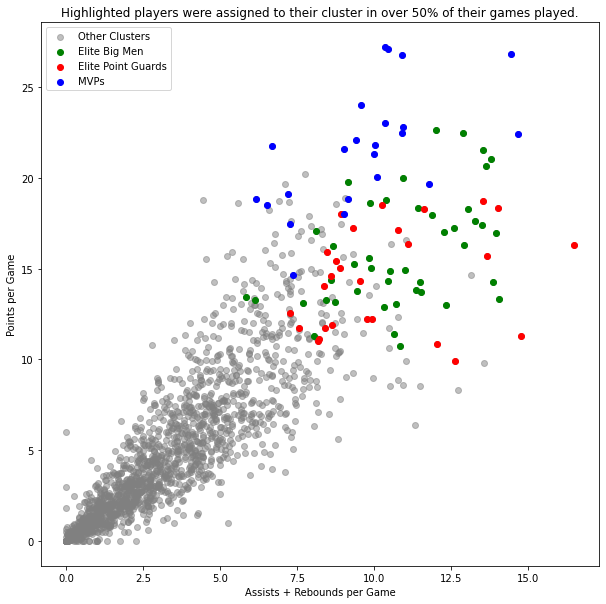

In [152]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(data.ast + data.reb, data.pts, color ='gray', alpha=0.5, label = "Other Clusters")
ax.scatter(cluster_6.ast + cluster_6.reb, cluster_6.pts, color ='green', label="Elite Big Men")
ax.scatter(cluster_10.ast + cluster_10.reb, cluster_10.pts, color ='red', label="Elite Point Guards")
ax.scatter(cluster_11.ast + cluster_11.reb, cluster_11.pts, color ='blue', label="MVPs")
ax.set_xlabel("Assists + Rebounds per Game")
ax.set_ylabel("Points per Game")
ax.legend()
ax.set_title("Highlighted players were assigned to their cluster in over 50% of their games played.")
# fig.suptitle("Box Score Statistics of Most Influential Clusters by Players' Career Statistics", size=16, y =0.95)